In [1]:
from kissim.encoding import FingerprintGenerator
from kissim.comparison import FingerprintDistanceGenerator
from pathlib import Path
from opencadd.databases.klifs import setup_remote
from src.evaluation.ligand_vs_kinase_evaluator import LigandVsKinaseEvaluator
from src.paths import PATH_RESULTS
import pandas as pd
from src import data
import matplotlib.pyplot as plt


SPECIES = "Human"
DFG_CONFORMATION = "in"
RESOLUTION_MAX = 4

HERE = Path(_dh[-1])  # noqa: F821
RESULTS = PATH_RESULTS / "dfg_in"

In [2]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../data/processed/"
structure_klifs_ids = pd.read_csv(
    DATA / "structure_klifs_ids_all.txt", squeeze=True, header=None
).to_list()
print(f"Number of structures: {len(structure_klifs_ids)}")
remote = setup_remote()
structures = remote.structures.by_structure_klifs_id(structure_klifs_ids)
pd.set_option("display.max_columns", 50)
structures

Number of structures: 4690


,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
0,1,3dko,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGA_EFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,IHZ,-,1,0,<NA>,<NA>,out,in,2.00,8.1,3,7,0.944,2.254,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,True,False,False,0.000000,0.000000,0.000000,<NA>,False
1,4,2rei,A,A,Human,415,EphA7,<NA>,<NA>,<NA>,RVIGAGEFGEVCSVAIKTLDFLCEASIMGQFDPNVVHLEGVMIVIE...,-,-,0,0,<NA>,<NA>,in,in,1.60,7.6,1,0,0.784,2.093,<NA>,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.746799,63.102798,77.154900,<NA>,False
2,8,3miy,-,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,B49,-,5,0,<NA>,<NA>,in,in,1.67,6.4,4,0,0.845,2.052,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.728800,53.692200,46.623100,<NA>,False
3,9,4m0y,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,M0Y,M0Y,6,6,<NA>,<NA>,in,out,1.70,8.0,0,0,0.817,2.200,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.555901,59.358200,69.081596,<NA>,False
4,11,3qgw,A,A,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,PQC,-,8,0,<NA>,<NA>,in,out,2.10,7.2,2,0,0.829,2.126,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.781099,58.850201,57.749901,<NA>,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,13855,7ree,A,A,Human,436,JAK2,<NA>,<NA>,<NA>,QQLGKGNFGSVEMVAVKKLDFEREIEILKSLQDNIVKYKGVKLIME...,4LY,-,4085,0,<NA>,<NA>,in,in,1.38,8.0,0,0,0.783,2.093,<NA>,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,15.880600,50.247898,39.763199,<NA>,False
4686,13857,7n3u,-,A,Human,333,Wee1,<NA>,<NA>,<NA>,EKIGSGEFGSVFKYAIKRSNALREVYAHAVLGSHVVRYFSALIQNE...,05J,-,4086,0,<NA>,<NA>,in,in,2.65,8.0,0,0,0.777,2.116,<NA>,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,19.308500,63.620499,52.645802,<NA>,False
4687,13862,7ni6,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,AGS,-,38,0,<NA>,<NA>,in,in,2.80,7.2,0,0,1.540,3.176,<NA>,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.298500,73.256500,84.482002,<NA>,False
4688,13863,7ni5,-,A,Human,94,ATM,<NA>,<NA>,<NA>,LAGGVNLPKIIDCQLVKGRDLRQDAVMQQVFQLTICTYKVVSGVLE...,UF8,-,4089,0,<NA>,<NA>,in,in,2.78,7.2,0,0,1.547,3.174,<NA>,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,20.552401,72.915901,83.977898,<NA>,False


In [4]:
%%time
DATA = PATH_RESULTS / "dfg_in"
fingerprint_distance_file = DATA / "fingerprint_distances.csv.bz2"
fingerprint_distances_df = pd.read_csv(fingerprint_distance_file)

CPU times: user 11.4 s, sys: 229 ms, total: 11.6 s
Wall time: 11.7 s


In [5]:
fingerprint_distances_df

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
0,4,8,EphA7,ITK,0.064311,0.954000
1,4,9,EphA7,ITK,0.094182,0.985333
2,4,11,EphA7,ITK,0.075470,0.977333
3,4,12,EphA7,ITK,0.066460,0.962000
4,4,16,EphA7,ITK,0.075279,0.985333
...,...,...,...,...,...,...
8452211,13857,13863,Wee1,ATM,0.150554,0.972000
8452212,13857,13864,Wee1,ATM,0.148120,0.972000
8452213,13862,13863,ATM,ATM,0.011811,0.976667
8452214,13862,13864,ATM,ATM,0.012624,0.976667


In [14]:
from src import data

ligand_kinase_matrix = data.profiling.load(
        'karaman-davis',
        pkidb_ligands=True,
        fda_approved=False,
        kinmap_kinases=True,
    )
ligand_kinase_matrix

           ligand.input            ligand.pkidb
0         Staurosporine  unknown (not in PKIDB)
1           JNJ-7706621  unknown (not in PKIDB)
2              MLN-8054  unknown (not in PKIDB)
3               PKC-412             Midostaurin
4              SU-14813  unknown (not in PKIDB)
5             SB-202190  unknown (not in PKIDB)
6             CP-724714  unknown (not in PKIDB)
7        VX-680/MK-0457  unknown (not in PKIDB)
9   Roscovitine/CYC-202  unknown (not in PKIDB)
10            SB-203580  unknown (not in PKIDB)
12            CP-690550             Tofacitinib
14              GW-2580  unknown (not in PKIDB)
16            GW-786034  unknown (not in PKIDB)
18               VX-745            Neflamapimod
19            SB-431542  unknown (not in PKIDB)
20              ZD-6474              Vandetanib
22         Flavopiridol               Alvocidib
24              MLN-518              Tandutinib
25            LY-333531           Ruboxistaurin
26              CI-1033              Can

,Midostaurin,Dasatinib,Gefitinib,Tofacitinib,Imatinib,Lapatinib,Sorafenib,Neflamapimod,Vandetanib,Sunitinib,Alvocidib,Erlotinib,Tandutinib,Ruboxistaurin,Canertinib,Pelitinib,Vatalanib,Fedratinib,Nilotinib,Axitinib,Quizartinib,Linifanib,Neratinib,Masitinib,Brivanib,Crizotinib,Motesanib,Doramapimod,Enzastaurin,Lestaurtinib,Pazopanib,Pictilisib,Bosutinib,Afatinib,Cediranib
AAK1,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,5300.0,1200.0,NaN,900.0,NaN,3500.0,NaN,35.0,NaN,1200.0,NaN,NaN,NaN,NaN,NaN,2300.0,NaN,NaN,2700.0,3.1,2900.0,9100.0,2300.000,NaN,NaN
ABL1,NaN,0.046,480.0,NaN,12.0,NaN,680.0,730.0,NaN,150.0,1500.0,NaN,NaN,NaN,NaN,560.0,NaN,44.0,13.0,36.0,NaN,NaN,NaN,55.0,640.0,110.0,6700.0,NaN,NaN,1000.0,650.0,NaN,0.057,570.0,78.0
ABL2,NaN,0.170,1600.0,NaN,10.0,NaN,2900.0,1900.0,69.0,1000.0,NaN,200.0,NaN,NaN,870.0,370.0,NaN,570.0,26.0,70.0,NaN,NaN,NaN,110.0,1800.0,460.0,4500.0,1300.0,NaN,6500.0,3000.0,NaN,1.500,NaN,730.0
ACK,120.0,5.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8900.0,NaN,NaN,NaN,NaN,NaN,5200.0,NaN,64.0,NaN,6000.0,NaN,NaN,680.0,NaN,NaN,760.0,NaN,NaN,NaN,6.6,NaN,NaN,29.000,NaN,NaN
ACTR2,NaN,210.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p38d,NaN,NaN,NaN,NaN,NaN,NaN,6600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,3500.0,NaN,NaN,NaN,NaN,NaN
p38g,NaN,NaN,NaN,NaN,NaN,NaN,7600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,2.9,NaN,370.0,NaN,NaN,NaN,NaN,NaN
p70S6K,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,48.0,3700.0,NaN,NaN,210.0,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,2800.0,NaN,NaN,NaN,640.0,NaN,NaN,1800.0,69.0,NaN,NaN,660.000,NaN,NaN
skMLCK,NaN,3500.000,1900.0,NaN,NaN,NaN,5400.0,NaN,NaN,49.0,NaN,970.0,NaN,NaN,NaN,3900.0,NaN,3000.0,NaN,1300.0,NaN,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,2000.0,NaN,NaN,NaN,NaN


In [18]:
structures['ligand.name'].value_counts()

Series([], Name: ligand.name, dtype: Int64)

In [23]:
structures[structures['structure.pdb_id'] == '4nct']

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag
1531,3794,4nct,-,A,Human,227,DYRK1A,<NA>,<NA>,<NA>,SLIGKGSFGQVVKVAIKIIQAQIEVRLLELMNYYIVHLKRHCLVFE...,2K2,-,1147,0,<NA>,<NA>,in,in,2.6,8.0,0,0,0.778,2.117,<NA>,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,17.679001,56.969101,59.5173,<NA>,False


In [33]:
drug_name_to_expo_id = {
    'Midostaurin': '2K2',
    'Dasatinib' : '1N1',
    "Gefitinib" : 'IRE',
    "Tofacitinib": "MI1",
    "Imatinib" : "STI",
    'Lapatinib' : 'FMM',
    "Sorafenib": "BAX",
    "Neflamapimod" : "52P",
    "Vandetanib" : "ZD6",
    "Sunitinib" : "B49",
    "Alvocidib" : "CPB",
    "Erlotinib" : "AQ4",
    "Tandutinib": "-",
    "Ruboxistaurin" :  "LY4",
    "Canertinib" : "-",
    "Pelitinib": "93J",
    "Vatalanib" : "-",
    "Fedratinib": "2TA",
    "Nilotinib" : "NIL",
    "Axitinib" : "AXI",
    "Quizartinib" : "P30",
    "Linifanib" : "-",
    "Neratinib" : "HKI",
    "Masitinib" : "G65",
    "Brivanib" :  "-",
    "Crizotinib" : "4MK",
    "Motesanib" : "706",
    "Doramapimod" : "B96",
    "Enzastaurin" : "-",
    "Lestaurtinib" : "2V9",
    "Pazopanib" : "-",
    "Pictilisib" : "GD9",
    "Bosutinib" : "DB8",
    "Afatinib" : "0WM",
    "Cediranib" : "AV3"
}
#assert len of this dict is equal to number of cols in ligand_kinase_matrix
assert len(drug_name_to_expo_id) == ligand_kinase_matrix.shape[1]
drug_name_to_expo_id_with_valid_ids = {k: v for k, v in drug_name_to_expo_id.items() if v != "-"}

#make same dict but with keys and values swapped
expo_id_to_drug_name = {v: k for k, v in drug_name_to_expo_id.items()}
structures['drug_name'] = structures['ligand.expo_id'].map(expo_id_to_drug_name)

structures_profiling_ligands = structures[structures['ligand.expo_id'].isin(drug_name_to_expo_id_with_valid_ids.values())]
print(structures_profiling_ligands['drug_name'].value_counts())

#also check if some of these are allosteric (in ligand_allosteric.expo_id instead of ligand.expo_id)
structures_profiling_ligands_allosteric = structures[structures['ligand_allosteric.expo_id'].isin(drug_name_to_expo_id_with_valid_ids.values())]
print(structures_profiling_ligands_allosteric['drug_name'].value_counts())




Dasatinib        14
Imatinib         12
Bosutinib        12
Sunitinib        11
Sorafenib         7
Gefitinib         6
Tofacitinib       5
Doramapimod       4
Axitinib          4
Neflamapimod      3
Nilotinib         3
Lapatinib         2
Ruboxistaurin     2
Erlotinib         2
Neratinib         1
Alvocidib         1
Vandetanib        1
Midostaurin       1
Lestaurtinib      1
Motesanib         1
Crizotinib        1
Pelitinib         1
Pictilisib        1
Fedratinib        1
Name: drug_name, dtype: int64
Imatinib     1
Gefitinib    1
Bosutinib    1
Name: drug_name, dtype: int64


In [36]:
structures_profiling_ligands

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag,drug_name,ligand_kinase_matrix_value
2,8,3miy,-,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,B49,-,5,0,<NA>,<NA>,in,in,1.67,6.4,4,0,0.845,2.052,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.728800,53.692200,46.623100,<NA>,False,Sunitinib,13.00
35,94,3fzs,-,A,Human,424,PYK2,<NA>,<NA>,<NA>,RILGEGFFGEVYEVAVKTCKFMSEAVIMKNLDPHIVKLIGIWIIME...,B96,-,42,0,<NA>,<NA>,out,in,1.75,6.8,2,0,0.921,2.418,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,True,False,True,20.442101,70.917702,79.072502,<NA>,False,Doramapimod,990.00
45,117,3gvu,A,A,Human,393,ABL2,<NA>,<NA>,<NA>,HKLGGGQYGEVYVVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIVTE...,STI,STI,48,48,<NA>,<NA>,out,in,2.05,9.8,0,2,0.896,2.289,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False,17.652399,58.694000,9.283190,<NA>,False,Imatinib,10.00
131,393,1t46,A,A,Human,451,KIT,<NA>,<NA>,<NA>,KTLGAGAFGKVVEVAVKMLALMSELKVLSYLGMNIVNLLGALVITE...,STI,-,48,0,<NA>,<NA>,out,in,1.60,7.6,0,0,0.907,2.309,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False,18.140200,57.930801,47.527401,<NA>,False,Imatinib,13.00
132,395,3g0f,-,A,Human,451,KIT,<NA>,<NA>,<NA>,KTLGAGAFGKVVEVAVKMLALMSELKVLSYLGMNIVNLLGALVITE...,B49,-,5,0,<NA>,<NA>,out,in,2.60,8.0,0,0,0.927,2.293,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.805599,62.431000,44.363499,<NA>,False,Sunitinib,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,11076,6nfy,A,B,Human,358,HPK1,<NA>,<NA>,<NA>,QRLGGGTYGEVFKVALKMVTLQKEILILKTCRANIVAYHGSWICME...,B49,-,5,0,<NA>,<NA>,in,out,2.17,8.0,0,0,0.873,2.260,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.462700,56.964802,41.982300,<NA>,False,Sunitinib,NaN
3831,11078,6nfz,-,A,Human,358,HPK1,<NA>,<NA>,<NA>,QRLG__TYGEVFKVALKMVTLQKEILILKTCRANIVAYHGSWICME...,B49,-,5,0,<NA>,<NA>,in,in,2.97,7.2,2,26,0.779,2.055,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False,Sunitinib,NaN
3969,11545,6op9,A,A,Human,408,ErbB3,<NA>,<NA>,<NA>,KVLGSGVFGTVHKVCIKVIAVTDHMLAIGSLDAHIVRLLGLQLVTQ...,DB8,-,252,0,<NA>,<NA>,in,out,2.50,9.6,0,4,0.839,2.197,<NA>,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,14.646400,47.735600,35.004700,<NA>,False,Bosutinib,NaN
4126,12103,6jol,-,A,Human,452,PDGFRa,<NA>,<NA>,<NA>,RVLGSGAFGKVVEVAVKMLALMSELKIMTHLGLNIVNLLGAYIITE...,STI,-,48,0,<NA>,<NA>,out,in,1.90,8.0,0,0,0.907,2.299,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False,18.125900,57.618698,44.724899,<NA>,False,Imatinib,NaN


In [44]:
structures_profiling_ligands
#now iterate over row, get kinase.klifs_name and drug_name, get the corresponding value from ligand_kinase_matrix and add it to the dataframe
for index, row in structures_profiling_ligands.iterrows():
    drug_name = row['drug_name']
    kinase_name = row['kinase.klifs_name']
    try:
        ligand_kinase_matrix_value = ligand_kinase_matrix.loc[kinase_name, drug_name]
        structures_profiling_ligands.at[index, 'ligand_kinase_matrix_value'] = ligand_kinase_matrix_value
    except KeyError:
        print(drug_name, kinase_name)

structures_profiling_ligands


Tofacitinib JAK3
Tofacitinib JAK1
Tofacitinib TYK2
Tofacitinib JAK2
Pictilisib p110g
Fedratinib JAK2


,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag,drug_name,ligand_kinase_matrix_value
2,8,3miy,-,B,Human,474,ITK,<NA>,<NA>,<NA>,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,B49,-,5,0,<NA>,<NA>,in,in,1.67,6.4,4,0,0.845,2.052,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.728800,53.692200,46.623100,<NA>,False,Sunitinib,13.00
35,94,3fzs,-,A,Human,424,PYK2,<NA>,<NA>,<NA>,RILGEGFFGEVYEVAVKTCKFMSEAVIMKNLDPHIVKLIGIWIIME...,B96,-,42,0,<NA>,<NA>,out,in,1.75,6.8,2,0,0.921,2.418,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,True,False,True,20.442101,70.917702,79.072502,<NA>,False,Doramapimod,990.00
45,117,3gvu,A,A,Human,393,ABL2,<NA>,<NA>,<NA>,HKLGGGQYGEVYVVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIVTE...,STI,STI,48,48,<NA>,<NA>,out,in,2.05,9.8,0,2,0.896,2.289,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False,17.652399,58.694000,9.283190,<NA>,False,Imatinib,10.00
131,393,1t46,A,A,Human,451,KIT,<NA>,<NA>,<NA>,KTLGAGAFGKVVEVAVKMLALMSELKVLSYLGMNIVNLLGALVITE...,STI,-,48,0,<NA>,<NA>,out,in,1.60,7.6,0,0,0.907,2.309,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False,18.140200,57.930801,47.527401,<NA>,False,Imatinib,13.00
132,395,3g0f,-,A,Human,451,KIT,<NA>,<NA>,<NA>,KTLGAGAFGKVVEVAVKMLALMSELKVLSYLGMNIVNLLGALVITE...,B49,-,5,0,<NA>,<NA>,out,in,2.60,8.0,0,0,0.927,2.293,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.805599,62.431000,44.363499,<NA>,False,Sunitinib,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,11076,6nfy,A,B,Human,358,HPK1,<NA>,<NA>,<NA>,QRLGGGTYGEVFKVALKMVTLQKEILILKTCRANIVAYHGSWICME...,B49,-,5,0,<NA>,<NA>,in,out,2.17,8.0,0,0,0.873,2.260,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.462700,56.964802,41.982300,<NA>,False,Sunitinib,16.00
3831,11078,6nfz,-,A,Human,358,HPK1,<NA>,<NA>,<NA>,QRLG__TYGEVFKVALKMVTLQKEILILKTCRANIVAYHGSWICME...,B49,-,5,0,<NA>,<NA>,in,in,2.97,7.2,2,26,0.779,2.055,<NA>,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False,Sunitinib,16.00
3969,11545,6op9,A,A,Human,408,ErbB3,<NA>,<NA>,<NA>,KVLGSGVFGTVHKVCIKVIAVTDHMLAIGSLDAHIVRLLGLQLVTQ...,DB8,-,252,0,<NA>,<NA>,in,out,2.50,9.6,0,4,0.839,2.197,<NA>,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,14.646400,47.735600,35.004700,<NA>,False,Bosutinib,0.77
4126,12103,6jol,-,A,Human,452,PDGFRa,<NA>,<NA>,<NA>,RVLGSGAFGKVVEVAVKMLALMSELKIMTHLGLNIVNLLGAYIITE...,STI,-,48,0,<NA>,<NA>,out,in,1.90,8.0,0,0,0.907,2.299,<NA>,True,True,True,False,False,True,True,False,False,False,True,False,False,True,False,18.125900,57.618698,44.724899,<NA>,False,Imatinib,31.00


In [47]:
#for each unique drug_name, count number of non-nan values in ligand_kinase_matrix_value
structures_profiling_ligands.groupby('drug_name')['ligand_kinase_matrix_value'].count().sort_values(ascending=False)    

drug_name
Dasatinib        13
Bosutinib        12
Imatinib         11
Sunitinib        10
Sorafenib         7
Gefitinib         6
Doramapimod       4
Axitinib          4
Nilotinib         3
Neflamapimod      3
Erlotinib         2
Lapatinib         2
Ruboxistaurin     2
Alvocidib         1
Tofacitinib       1
Pelitinib         1
Midostaurin       1
Neratinib         1
Motesanib         1
Lestaurtinib      1
Crizotinib        1
Vandetanib        1
Pictilisib        0
Fedratinib        0
Name: ligand_kinase_matrix_value, dtype: int64

In [53]:
#okay lets look at dasatinib
dasatinib_df = structures_profiling_ligands[structures_profiling_ligands['drug_name'] == 'Dasatinib']
#only where ligand_kinase_matrix_value is not nan
dasatinib_df = dasatinib_df.dropna(subset=['ligand_kinase_matrix_value'])
#print len and number of unique kinase.klifs_name
print(f'N entries: {len(dasatinib_df)}, unique kinases: {dasatinib_df["kinase.klifs_name"].nunique()}')
#and print out the duplicated kinase.klifs_name
dasatinib_df[dasatinib_df.duplicated(subset='kinase.klifs_name', keep=False)]

N entries: 13, unique kinases: 10


,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.names,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.klifs_id,ligand_allosteric.klifs_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,interaction.fingerprint,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.curation_flag,drug_name,ligand_kinase_matrix_value
384,1060,2gqg,A,A,Human,392,ABL1,<NA>,<NA>,<NA>,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1N1,-,281,0,<NA>,<NA>,in,in,2.40,8.0,0,0,0.781,2.127,<NA>,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,15.796900,52.520901,32.246799,<NA>,False,Dasatinib,0.046
394,1094,4xey,-,A,Human,392,ABL1,<NA>,<NA>,<NA>,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1N1,-,281,0,<NA>,<NA>,out-like,in,2.89,6.4,4,0,0.862,1.965,<NA>,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False,Dasatinib,0.046
1148,2899,3oct,A,A,Human,473,BTK,<NA>,<NA>,<NA>,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,1N1,-,281,0,<NA>,<NA>,out-like,in,1.95,8.2,2,10,0.882,2.113,<NA>,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,0.000000,0.000000,0.000000,<NA>,False,Dasatinib,1.400
1165,2932,3k54,A,A,Human,473,BTK,<NA>,<NA>,<NA>,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,1N1,-,281,0,<NA>,<NA>,in,in,1.94,7.2,2,0,0.810,2.193,<NA>,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,19.055201,61.959702,39.166302,<NA>,False,Dasatinib,1.400
1301,3254,5bvw,-,A,Human,404,DDR1,<NA>,<NA>,<NA>,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,1N1,-,281,0,<NA>,<NA>,out,in,1.94,6.4,2,0,0.999,2.307,<NA>,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,17.964500,58.518200,55.862999,<NA>,False,Dasatinib,0.690
3721,10761,6bsd,-,A,Human,404,DDR1,<NA>,<NA>,<NA>,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,1N1,-,281,0,<NA>,<NA>,out-like,in,2.61,8.4,2,4,0.998,2.217,<NA>,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,17.958599,59.180901,59.833500,<NA>,False,Dasatinib,0.690


/localhome/cschiebroek/.conda/envs/kissim-app/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'count')

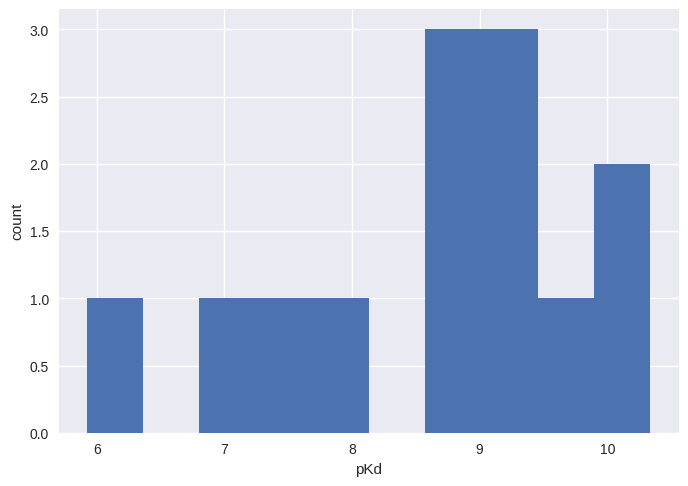

In [70]:
dasatinib_df_slim = dasatinib_df[['structure.klifs_id', 'structure.pdb_id','kinase.klifs_name', 'ligand_kinase_matrix_value','structure.dfg','structure.ac_helix','structure.resolution','structure.qualityscore','structure.pocket']]
#also add pKd from ligand_kinase_matrix_value: pKd = -log10(Kd*10^-9)

import numpy as np
dasatinib_df_slim['pKd'] = -np.log10(dasatinib_df_slim['ligand_kinase_matrix_value']*10**-9)
dasatinib_df_slim
#hist of pKd
plt.hist(dasatinib_df_slim['pKd'])
plt.xlabel('pKd')
plt.ylabel('count')

In [56]:
print(dasatinib_df['structure.dfg'].value_counts())
print(dasatinib_df['structure.ac_helix'].value_counts())

in          7
out-like    4
out         1
na          1
Name: structure.dfg, dtype: Int64
in     12
out     1
Name: structure.ac_helix, dtype: Int64


In [78]:
#now also get the fingerprints for these
from src.paths import PATH_RESULTS
DATA = PATH_RESULTS / "dfg_in"
fingerprints_file = DATA / "fingerprints_normalized.json"
fingerprints = FingerprintGenerator.from_json(fingerprints_file)
print(f"Number of fingerprints: {len(fingerprints.data)}")

Number of fingerprints: 4112


In [81]:
fp1 = fingerprints.data[815]

In [83]:
dasatinib_df
#get the klifs ids
klifs_ids_dasatinib = dasatinib_df['structure.klifs_id'].to_list()

In [43]:
ligand_kinase_matrix

,Midostaurin,Dasatinib,Gefitinib,Tofacitinib,Imatinib,Lapatinib,Sorafenib,Neflamapimod,Vandetanib,Sunitinib,Alvocidib,Erlotinib,Tandutinib,Ruboxistaurin,Canertinib,Pelitinib,Vatalanib,Fedratinib,Nilotinib,Axitinib,Quizartinib,Linifanib,Neratinib,Masitinib,Brivanib,Crizotinib,Motesanib,Doramapimod,Enzastaurin,Lestaurtinib,Pazopanib,Pictilisib,Bosutinib,Afatinib,Cediranib
AAK1,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,5300.0,1200.0,NaN,900.0,NaN,3500.0,NaN,35.0,NaN,1200.0,NaN,NaN,NaN,NaN,NaN,2300.0,NaN,NaN,2700.0,3.1,2900.0,9100.0,2300.000,NaN,NaN
ABL1,NaN,0.046,480.0,NaN,12.0,NaN,680.0,730.0,NaN,150.0,1500.0,NaN,NaN,NaN,NaN,560.0,NaN,44.0,13.0,36.0,NaN,NaN,NaN,55.0,640.0,110.0,6700.0,NaN,NaN,1000.0,650.0,NaN,0.057,570.0,78.0
ABL2,NaN,0.170,1600.0,NaN,10.0,NaN,2900.0,1900.0,69.0,1000.0,NaN,200.0,NaN,NaN,870.0,370.0,NaN,570.0,26.0,70.0,NaN,NaN,NaN,110.0,1800.0,460.0,4500.0,1300.0,NaN,6500.0,3000.0,NaN,1.500,NaN,730.0
ACK,120.0,5.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8900.0,NaN,NaN,NaN,NaN,NaN,5200.0,NaN,64.0,NaN,6000.0,NaN,NaN,680.0,NaN,NaN,760.0,NaN,NaN,NaN,6.6,NaN,NaN,29.000,NaN,NaN
ACTR2,NaN,210.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p38d,NaN,NaN,NaN,NaN,NaN,NaN,6600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,3500.0,NaN,NaN,NaN,NaN,NaN
p38g,NaN,NaN,NaN,NaN,NaN,NaN,7600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,2.9,NaN,370.0,NaN,NaN,NaN,NaN,NaN
p70S6K,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,48.0,3700.0,NaN,NaN,210.0,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,2800.0,NaN,NaN,NaN,640.0,NaN,NaN,1800.0,69.0,NaN,NaN,660.000,NaN,NaN
skMLCK,NaN,3500.000,1900.0,NaN,NaN,NaN,5400.0,NaN,NaN,49.0,NaN,970.0,NaN,NaN,NaN,3900.0,NaN,3000.0,NaN,1300.0,NaN,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,2000.0,NaN,NaN,NaN,NaN


In [84]:
fingerprint_distance_generator = FingerprintDistanceGenerator.from_structure_klifs_ids(klifs_ids_dasatinib, remote, n_cores=16)
distance_matrix_dasatinib = fingerprint_distance_generator.kinase_distance_matrix(by="minimum", coverage_min=0.8)
distance_matrix_dasatinib

Calculate pairwise fingerprint distance:   0%|          | 0/78 [00:00<?, ?it/s]

Calculate pairwise fingerprint coverage:   0%|          | 0/78 [00:00<?, ?it/s]

kinase.2,ABL1,BMX,BRK,BTK,DDR1,EphA2,EphB4,LOK,MYT1,p38a
kinase.1,,,,,,,,,,
ABL1,0.000000,0.145971,0.214598,0.133099,0.143467,0.170371,0.163550,0.191085,0.220649,0.255283
BMX,0.145971,0.000000,0.219124,0.118898,0.173237,0.189163,0.181032,0.188232,0.233208,0.259776
BRK,0.214598,0.219124,0.000000,0.211343,0.254062,0.254192,0.259775,0.260664,0.280805,0.301546
BTK,0.133099,0.118898,0.211343,0.000000,0.179952,0.171645,0.170378,0.196102,0.235414,0.259039
DDR1,0.143467,0.173237,0.254062,0.179952,0.000000,0.162868,0.154185,0.217919,0.225872,0.231389
EphA2,0.170371,0.189163,0.254192,0.171645,0.162868,0.000000,0.102109,0.199777,0.242522,0.282947
EphB4,0.163550,0.181032,0.259775,0.170378,0.154185,0.102109,0.000000,0.191580,0.240019,0.268808
LOK,0.191085,0.188232,0.260664,0.196102,0.217919,0.199777,0.191580,0.000000,0.222130,0.263714
MYT1,0.220649,0.233208,0.280805,0.235414,0.225872,0.242522,0.240019,0.222130,0.000000,0.274074


In [87]:
dasatinib_df_slim

,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872
2058,5018,3lfa,p38a,27.000,na,in,2.10,6.1,SPVGS__YGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,7.568636
2870,7194,5i9y,EphA2,0.850,in,in,1.23,8.0,KVIGAGEFGEVYKVAIKTLDFLGEAGIMGQFSHNIIRLEGVMIITE...,9.070581
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057


In [99]:
dasatinib_df
#okay, now lets get AUROC: ABL is main target, get off-targets from dasatinib_df_slim; those with ligand_kinase_matrix_value < 100. then rank by distance to ABL
#and plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

ABL = 'ABL1'
off_targets = list(set(dasatinib_df_slim[dasatinib_df_slim['ligand_kinase_matrix_value'] <= 5]['kinase.klifs_name'].to_list()))
off_targets.remove(ABL)
off_targets
#also get the other kinases
not_off_targets = list(set(dasatinib_df_slim[dasatinib_df_slim['ligand_kinase_matrix_value'] > 5]['kinase.klifs_name'].to_list()))
#print lens of both
print(len(off_targets), len(not_off_targets))


5 4


In [108]:
distance_matrix_dasatinib_abl = distance_matrix_dasatinib['ABL1']
distance_matrix_dasatinib_abl = distance_matrix_dasatinib_abl.sort_values()
print(distance_matrix_dasatinib_abl)
#add these to dasatinib_df_slim as col 'distance_to_abl'
dasatinib_df_slim['distance_to_abl'] = dasatinib_df_slim['kinase.klifs_name'].map(distance_matrix_dasatinib_abl)
dasatinib_df_slim

kinase.1
ABL1     0.000000
BTK      0.133099
DDR1     0.143467
BMX      0.145971
EphB4    0.163550
EphA2    0.170371
LOK      0.191085
BRK      0.214598
MYT1     0.220649
p38a     0.255283
Name: ABL1, dtype: float64


/localhome/cschiebroek/.conda/envs/kissim-app/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971
2058,5018,3lfa,p38a,27.000,na,in,2.10,6.1,SPVGS__YGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,7.568636,0.255283
2870,7194,5i9y,EphA2,0.850,in,in,1.23,8.0,KVIGAGEFGEVYKVAIKTLDFLGEAGIMGQFSHNIIRLEGVMIITE...,9.070581,0.170371
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649


Pearson: -0.7747219983279566, Spearman: -0.7454863223783837, Kendall: -0.5541046502875785


,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl,residuals,similarity_to_abl,residuals_abl
3141,8384,5owr,LOK,1200.000,in,in,2.30,6.4,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,5.920819,0.191085,5.729734,0.808915,0.082561
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649,6.665408,0.779351,0.008469
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971,8.707901,0.854029,-0.007632
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
3721,10761,6bsd,DDR1,0.690,out-like,in,2.61,8.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598,7.893307,0.785402,-0.041846


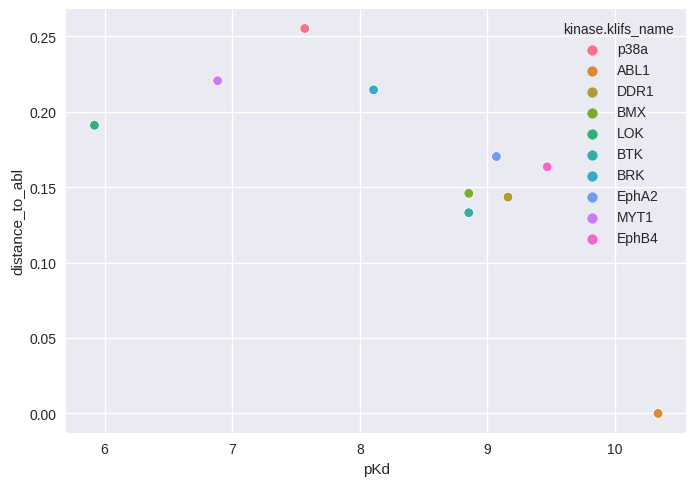

In [141]:
#first; do scatter of distance to ABL vs pKd
import seaborn as sns
sns.scatterplot(x='pKd', y='distance_to_abl', data=dasatinib_df_slim, hue='kinase.klifs_name')
#get ktau, spearman, pearson
from scipy.stats import pearsonr, spearmanr, kendalltau
pearson_corr, _ = pearsonr(dasatinib_df_slim['pKd'], dasatinib_df_slim['distance_to_abl'])
spearman_corr, _ = spearmanr(dasatinib_df_slim['pKd'], dasatinib_df_slim['distance_to_abl'])
kendall_corr, _ = kendalltau(dasatinib_df_slim['pKd'], dasatinib_df_slim['distance_to_abl'])
print(f'Pearson: {pearson_corr}, Spearman: {spearman_corr}, Kendall: {kendall_corr}')
#and get the ROC curve
#get the points that deviate most from the correlation
#first get the similarity to abl instead of distance
dasatinib_df_slim['similarity_to_abl'] = 1 - dasatinib_df_slim['distance_to_abl']
#get the off-targets
#get the fit, and the residuals
import numpy as np

def fit(x, y):
    return np.polyfit(x, y, 1)


residuals(x, y, fit):
    return y - (fit[0]*x + fit[1])

fit_abl = fit(dasatinib_df_slim['pKd'], dasatinib_df_slim['similarity_to_abl'])
residuals_abl = residuals(dasatinib_df_slim['pKd'], dasatinib_df_slim['similarity_to_abl'], fit_abl)
#add residuals to dataframe
dasatinib_df_slim['residuals_abl'] = residuals_abl
#sort by residuals
dasatinib_df_slim = dasatinib_df_slim.sort_values('residuals_abl', ascending=False)
dasatinib_df_slim

In [143]:
%%time
from src.paths import PATH_RESULTS
DATA = PATH_RESULTS / "dfg_in"
fingerprints_file = DATA / "fingerprints_normalized.json"
fingerprints = FingerprintGenerator.from_json(fingerprints_file)
print(f"Number of fingerprints: {len(fingerprints.data)}")

Number of fingerprints: 4112
CPU times: user 672 ms, sys: 73.3 ms, total: 745 ms
Wall time: 747 ms


In [148]:
dasatinib_df_slim

,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl,residuals,similarity_to_abl,residuals_abl
3141,8384,5owr,LOK,1200.000,in,in,2.30,6.4,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,5.920819,0.191085,5.729734,0.808915,0.082561
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649,6.665408,0.779351,0.008469
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971,8.707901,0.854029,-0.007632
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
3721,10761,6bsd,DDR1,0.690,out-like,in,2.61,8.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598,7.893307,0.785402,-0.041846


KeyError: 1094

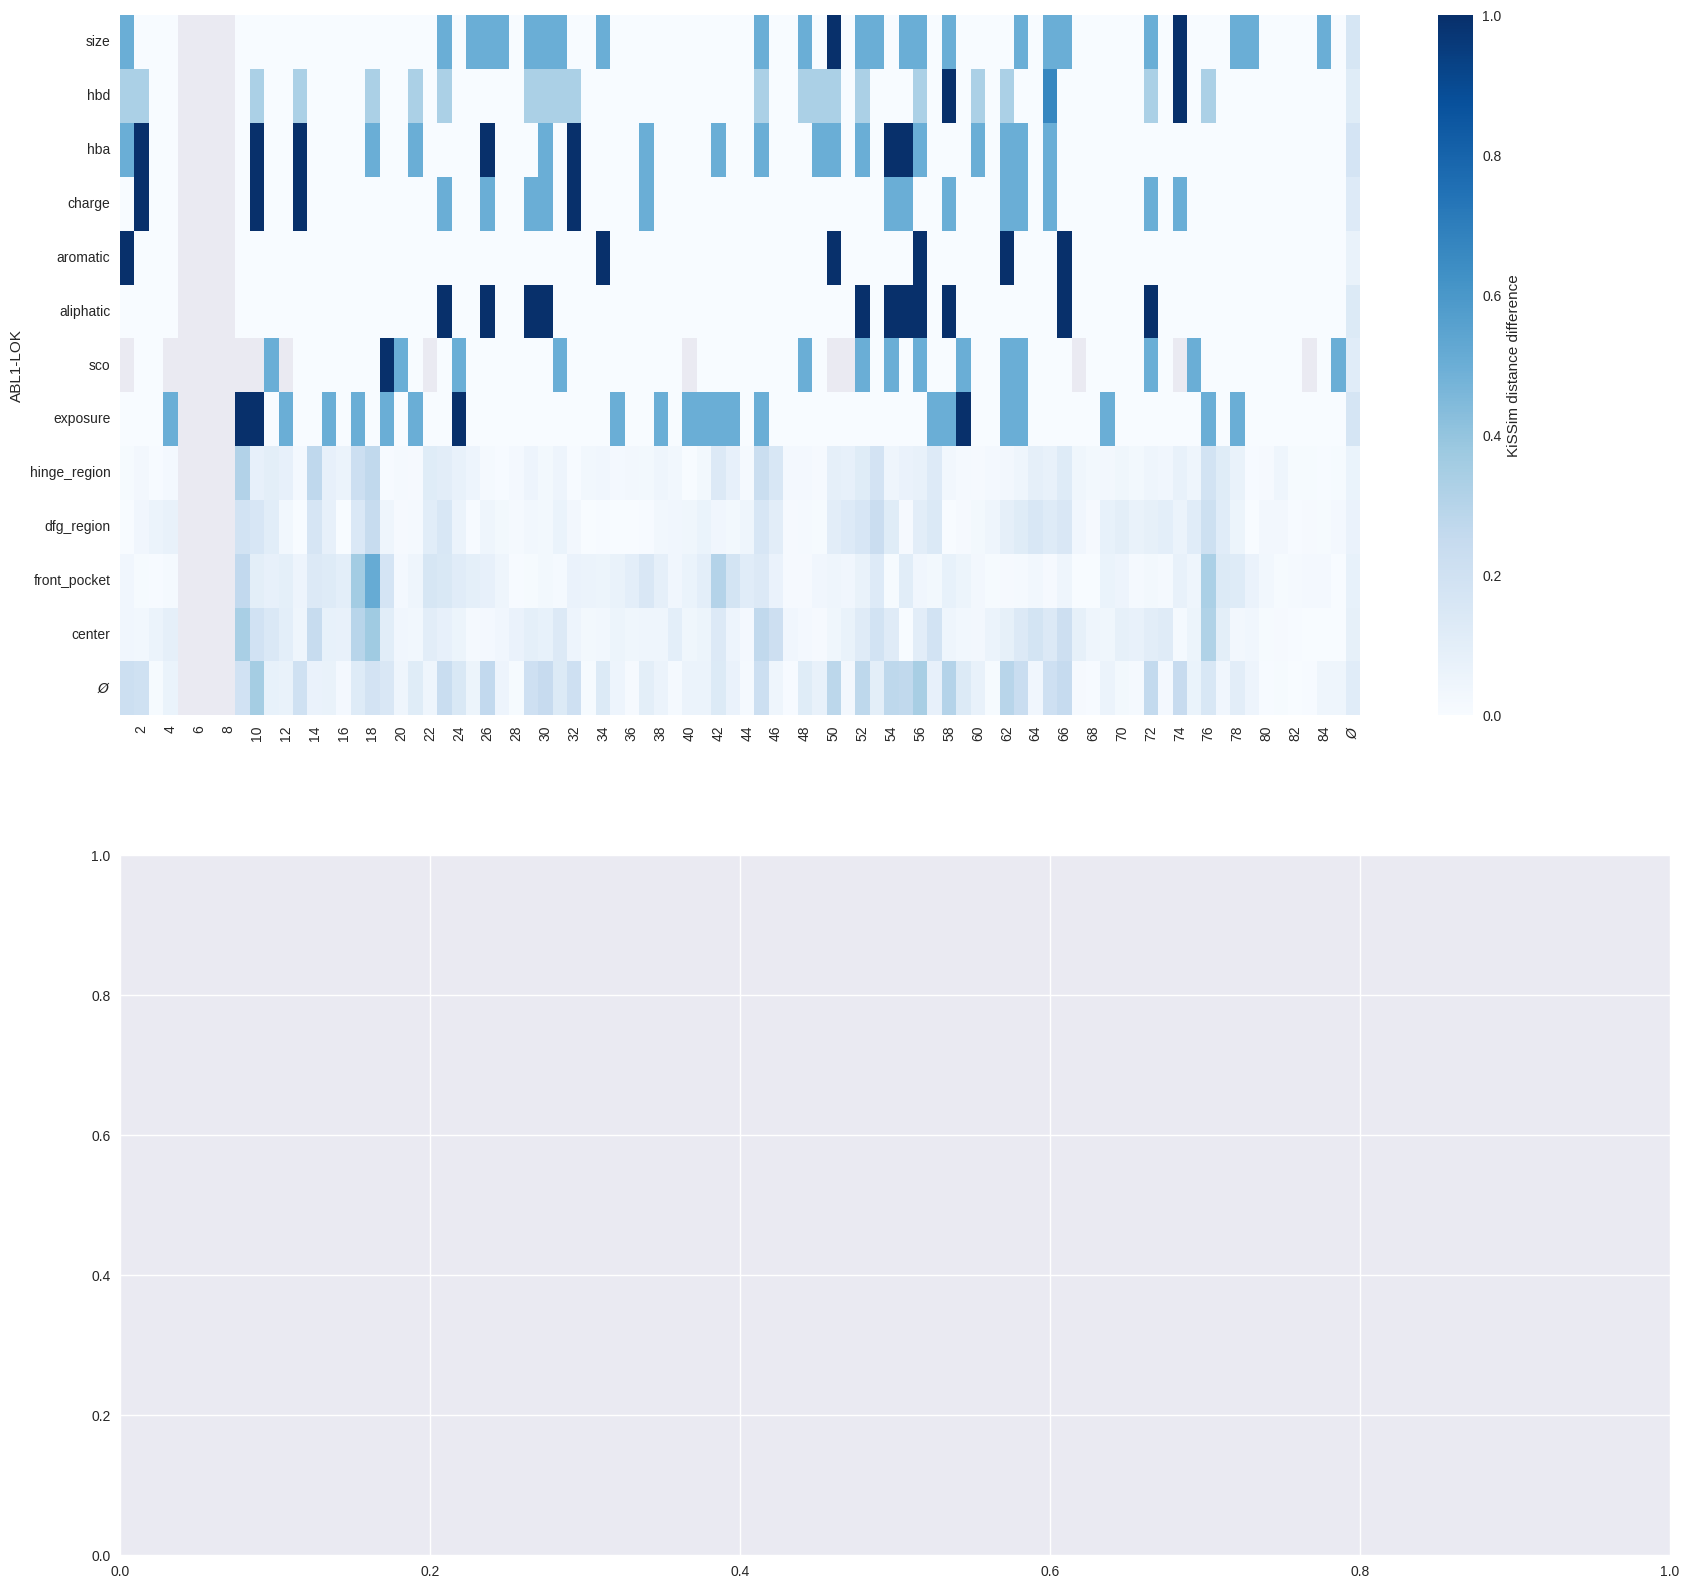

In [162]:
fingerprints.data[1060]
import seaborn as sns
def plot_fingerprint_diff(fingerprints, id_1,id_2, ax,k1,k2):
    """
    Plot fingerprint diff features.
    """

    fp1 = fingerprints.data[id_1]
    fp2 = fingerprints.data[id_2]
    fp_diff_physchem = (fp1.physicochemical.transpose() - fp2.physicochemical.transpose()).abs()
    fp_diff_distances = (fp1.distances.transpose() - fp2.distances.transpose()).abs()
    fp_diff = pd.concat([fp_diff_physchem, fp_diff_distances])

    # Column mean
    fp_diff_col_mean = fp_diff.mean(axis=0)
    fp_diff_col_mean.name = "$\O$"  # noqa: W605
    fp_diff = pd.concat([fp_diff, pd.DataFrame(fp_diff_col_mean).transpose()], axis=0)

    # Row mean
    fp_diff_row_mean = fp_diff.mean(axis=1)
    fp_diff_row_mean.name = "$\O$"  # noqa: W605
    fp_diff = pd.concat([fp_diff, pd.DataFrame(fp_diff_row_mean)], axis=1)
    sns.heatmap(
        fp_diff,
        cmap="Blues",
        ax=ax,
        vmin=0,
        vmax=1,
        xticklabels=range(1, 87),
        cbar_kws={"label": "KiSSim distance difference"},
    )
    xticklabels = [i if i % 2 == 0 else "" for i in range(1, 86)] + ["$\O$"]  # noqa: W605
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel("-".join(sorted([k1,k2])))

fig, axes = plt.subplots(2, 1, figsize=(20, 20))
plot_fingerprint_diff(fingerprints, 1060, 8384, axes[0],'ABL1','LOK')
plot_fingerprint_diff(fingerprints, 1094, 8384, axes[1],'ABL1','LOK')

In [167]:
from kissim.encoding import FingerprintGenerator
dasitinib_klifs_ids = dasatinib_df_slim['structure.klifs_id'].to_list()
fingerprint_generator_dasatinib_strucs = FingerprintGenerator.from_structure_klifs_ids(
    structure_klifs_ids=dasitinib_klifs_ids, klifs_session=setup_remote()
)
fingerprints_dasatinib_strucs = list(fingerprint_generator_dasatinib_strucs.data.values())
print(f"Number of fingerprints: {len(fingerprints_dasatinib_strucs)}")

Number of fingerprints: 13


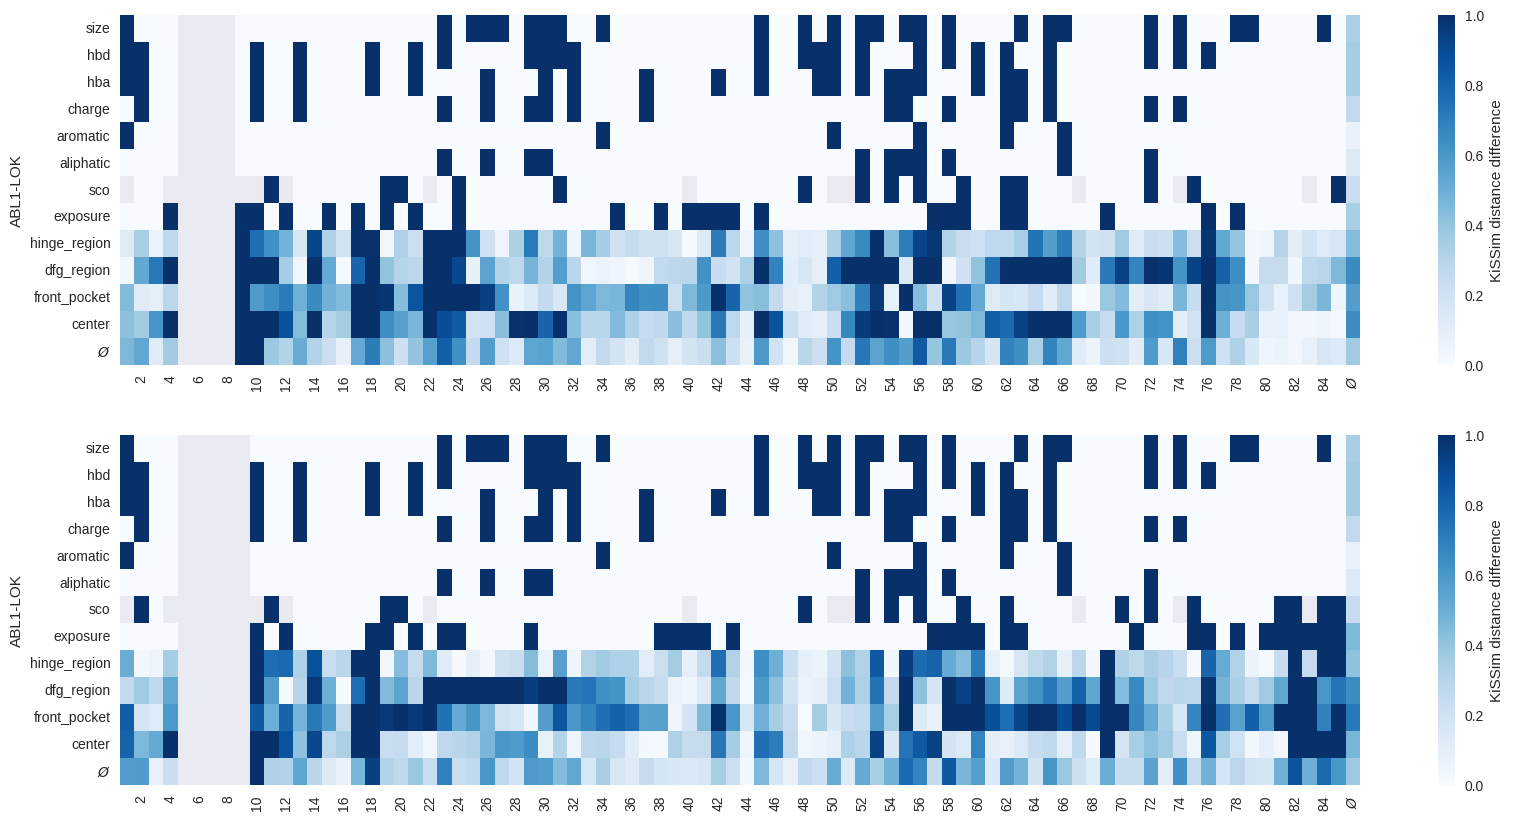

In [173]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
plot_fingerprint_diff(fingerprint_generator_dasatinib_strucs, 1060, 8384, axes[0],'ABL1','LOK')
plot_fingerprint_diff(fingerprint_generator_dasatinib_strucs, 1094, 8384, axes[1],'ABL1','LOK')

In [176]:
from kissim.comparison import FeatureDistances
def get_feature_distances(pair, fingerprints):

    fingerprint1 = fingerprints[pair[0]]
    fingerprint2 = fingerprints[pair[1]]

    feature_distances = FeatureDistances.from_fingerprints(fingerprint1, fingerprint2)

    return feature_distances

pair = (1060, 8384)
feature_distances = get_feature_distances(pair, fingerprints_dasatinib_strucs)

IndexError: list index out of range

In [181]:
feature_distances = FeatureDistances.from_fingerprints(fingerprints_dasatinib_strucs[0], fingerprints_dasatinib_strucs[1])
feature_distances._calculate_feature_distance()

TypeError: _calculate_feature_distance() missing 1 required positional argument: 'feature_pair'

In [183]:
fingerprint_distance_generator = FingerprintDistanceGenerator.from_fingerprint_generator(
    fingerprint_generator_dasatinib_strucs
)
fingerprint_distance_generator.data

Calculate pairwise fingerprint distance:   0%|          | 0/78 [00:00<?, ?it/s]

Calculate pairwise fingerprint coverage:   0%|          | 0/78 [00:00<?, ?it/s]

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
0,8384,1094,LOK,ABL1,0.195735,0.943333
1,8384,1060,LOK,ABL1,0.191085,0.950667
2,8384,8339,LOK,MYT1,0.222130,0.939333
3,8384,2932,LOK,BTK,0.196102,0.934667
4,8384,2899,LOK,BTK,0.209408,0.949333
...,...,...,...,...,...,...
73,7338,10342,BRK,EphB4,0.259775,0.985333
74,7338,5018,BRK,p38a,0.301546,0.929333
75,7194,10342,EphA2,EphB4,0.102109,0.992667
76,7194,5018,EphA2,p38a,0.282947,0.935333


In [187]:
distances_per_structure_abl = fingerprint_distance_generator.data
distances_per_structure_abl = distances_per_structure_abl[(fingerprint_distance_generator.data['kinase.1'] == 'ABL1') | (fingerprint_distance_generator.data['kinase.2'] == 'ABL1')]
distances_per_structure_abl.sort_values('distance', ascending=True)


,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
12,1094,1060,ABL1,ABL1,0.074699,0.956000
15,1094,2899,ABL1,BTK,0.133099,0.947333
24,1060,2932,ABL1,BTK,0.136401,0.978000
18,1094,10761,ABL1,DDR1,0.143467,0.939333
16,1094,3482,ABL1,BMX,0.145971,0.956000
17,1094,3254,ABL1,DDR1,0.149423,0.940000
26,1060,3482,ABL1,BMX,0.154313,0.956000
25,1060,2899,ABL1,BTK,0.163111,0.978000
31,1060,10342,ABL1,EphB4,0.163550,0.994000
14,1094,2932,ABL1,BTK,0.164047,0.940000


In [219]:
#get each unique pair of kinase1 and kinase2, keeping the one with highest bit_coverage
distances_per_structure_abl_unqiue = distances_per_structure_abl.sort_values('bit_coverage', ascending=False)
distances_per_structure_abl_unqiue = distances_per_structure_abl_unqiue.drop_duplicates(subset=['kinase.1','kinase.2'], keep='first')
distances_per_structure_abl_unqiue = distances_per_structure_abl_unqiue.sort_values('distance', ascending=True)
distances_per_structure_abl_unqiue
#for the one entry where LOK is kinase.1, switch the columns so that kinase.1 is always ABL1. also swap structure.1 and structure.2 for this row
#get the row where this is swapped
lok_row = distances_per_structure_abl_unqiue[(distances_per_structure_abl_unqiue['kinase.1'] == 'LOK') & (distances_per_structure_abl_unqiue['kinase.2'] == 'ABL1')]
lok_row

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
1,8384,1060,LOK,ABL1,0.191085,0.950667


In [220]:
#swap the columns
lok_row_swapped = lok_row.copy()
lok_row_swapped['kinase.1'] = 'ABL1'
lok_row_swapped['kinase.2'] = 'LOK'
lok_row_swapped['structure.1'] = lok_row['structure.2'].values[0]
lok_row_swapped['structure.2'] = lok_row['structure.1'].values[0]
lok_row_swapped

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
1,1060,8384,ABL1,LOK,0.191085,0.950667


In [221]:
#remove old row and add new row
distances_per_structure_abl_unqiue = distances_per_structure_abl_unqiue[~((distances_per_structure_abl_unqiue['kinase.1'] == 'LOK') & (distances_per_structure_abl_unqiue['kinase.2'] == 'ABL1'))]
distances_per_structure_abl_unqiue = distances_per_structure_abl_unqiue.append(lok_row_swapped)
distances_per_structure_abl_unqiue

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
12,1094,1060,ABL1,ABL1,0.074699,0.956000
26,1060,3482,ABL1,BMX,0.154313,0.956000
25,1060,2899,ABL1,BTK,0.163111,0.978000
31,1060,10342,ABL1,EphB4,0.163550,0.994000
27,1060,3254,ABL1,DDR1,0.164070,0.978000
30,1060,7194,ABL1,EphA2,0.184745,0.992000
23,1060,8339,ABL1,MYT1,0.220649,0.982667
29,1060,7338,ABL1,BRK,0.225849,0.985333
32,1060,5018,ABL1,p38a,0.273539,0.936667
1,1060,8384,ABL1,LOK,0.191085,0.950667


In [222]:
#and sort again by distance
distances_per_structure_abl_unqiue = distances_per_structure_abl_unqiue.sort_values('distance', ascending=True)
distances_per_structure_abl_unqiue

,structure.1,structure.2,kinase.1,kinase.2,distance,bit_coverage
12,1094,1060,ABL1,ABL1,0.074699,0.956000
26,1060,3482,ABL1,BMX,0.154313,0.956000
25,1060,2899,ABL1,BTK,0.163111,0.978000
31,1060,10342,ABL1,EphB4,0.163550,0.994000
27,1060,3254,ABL1,DDR1,0.164070,0.978000
30,1060,7194,ABL1,EphA2,0.184745,0.992000
1,1060,8384,ABL1,LOK,0.191085,0.950667
23,1060,8339,ABL1,MYT1,0.220649,0.982667
29,1060,7338,ABL1,BRK,0.225849,0.985333
32,1060,5018,ABL1,p38a,0.273539,0.936667


In [223]:
dasatinib_df_slim

,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl,residuals,similarity_to_abl,residuals_abl
3141,8384,5owr,LOK,1200.000,in,in,2.30,6.4,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,5.920819,0.191085,5.729734,0.808915,0.082561
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649,6.665408,0.779351,0.008469
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971,8.707901,0.854029,-0.007632
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
3721,10761,6bsd,DDR1,0.690,out-like,in,2.61,8.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598,7.893307,0.785402,-0.041846


{'LOK': 5.920818753952375, 'ABL1': 10.337242168318426, 'MYT1': 6.886056647693163, 'BTK': 8.853871964321762, 'BMX': 8.853871964321762, 'DDR1': 9.161150909262744, 'BRK': 8.10790539730952, 'EphA2': 9.070581074285707, 'EphB4': 9.468521082957745, 'p38a': 7.568636235841013}
Pearson: 0.6878522155675394, Spearman: 0.705170430668875, Kendall: 0.49441323247304414


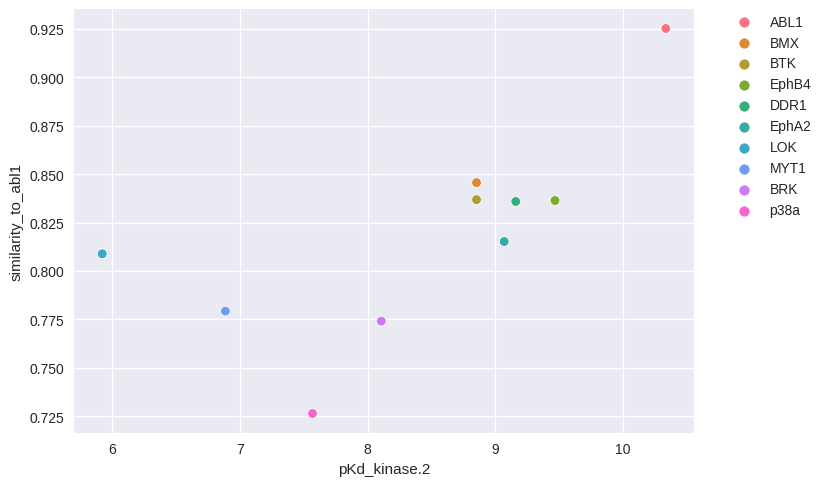

In [224]:
#make dict of kinase to pKd from dasatinib_df_slim
kinase_to_pKd_dasatinib = dict(zip(dasatinib_df_slim['kinase.klifs_name'], dasatinib_df_slim['pKd']))
print(kinase_to_pKd_dasatinib)
#add to distances_per_structure_abl_unqiue, based on kinase.2 (col name pKd_kinase.2)
distances_per_structure_abl_unqiue['pKd_kinase.2'] = distances_per_structure_abl_unqiue['kinase.2'].map(kinase_to_pKd_dasatinib)
distances_per_structure_abl_unqiue
#add similarity to ABL1
distances_per_structure_abl_unqiue['similarity_to_abl1'] = 1 - distances_per_structure_abl_unqiue['distance']

sns.scatterplot(x='pKd_kinase.2', y='similarity_to_abl1', data=distances_per_structure_abl_unqiue, hue='kinase.2')
from scipy.stats import pearsonr, spearmanr, kendalltau
pearson_corr, _ = pearsonr(distances_per_structure_abl_unqiue['pKd_kinase.2'], distances_per_structure_abl_unqiue['similarity_to_abl1'])
spearman_corr, _ = spearmanr(distances_per_structure_abl_unqiue['pKd_kinase.2'], distances_per_structure_abl_unqiue['similarity_to_abl1'])
kendall_corr, _ = kendalltau(distances_per_structure_abl_unqiue['pKd_kinase.2'], distances_per_structure_abl_unqiue['similarity_to_abl1'])
print(f'Pearson: {pearson_corr}, Spearman: {spearman_corr}, Kendall: {kendall_corr}')
#move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [266]:
ligand_kinase_matrix_abl_lok = ligand_kinase_matrix.loc[['ABL1','LOK'],:]
ligand_kinase_matrix_abl_lok = ligand_kinase_matrix_abl_lok.dropna(axis=1)
ligand_kinase_matrix_abl_lok_pkds = -np.log10(ligand_kinase_matrix_abl_lok*10**-9)
ligand_kinase_matrix_abl_lok_pkds
#get new df with ratio of pKd(ABL1)/pKd(LOK)
ratio_abl_lok = ligand_kinase_matrix_abl_lok_pkds.loc['ABL1',:]/ligand_kinase_matrix_abl_lok_pkds.loc['LOK',:]
ratio_abl_lok = ratio_abl_lok.sort_values(ascending=False)
print(ratio_abl_lok)
#also get absolute differences in pKd, and print those sorted
rel_difs_abl_lok = ligand_kinase_matrix_abl_lok_pkds.loc['ABL1',:] - ligand_kinase_matrix_abl_lok_pkds.loc['LOK',:]
rel_difs_abl_lok = rel_difs_abl_lok.sort_values(ascending=False)
print(rel_difs_abl_lok)

Dasatinib       1.745914
Nilotinib       1.526090
Fedratinib      1.328472
Axitinib        1.257207
Bosutinib       1.256192
Afatinib        1.163531
Gefitinib       0.998555
Pelitinib       0.964565
Crizotinib      0.945907
Cediranib       0.930565
Brivanib        0.930341
Sorafenib       0.903806
Sunitinib       0.883783
Pazopanib       0.874411
Motesanib       0.868311
Lestaurtinib    0.727791
dtype: float64
Dasatinib       4.416423
Nilotinib       2.718566
Bosutinib       2.089223
Fedratinib      1.818945
Axitinib        1.522879
Afatinib        0.877594
Gefitinib      -0.009143
Pelitinib      -0.229674
Crizotinib     -0.397940
Brivanib       -0.463757
Cediranib      -0.530367
Sorafenib      -0.656418
Motesanib      -0.784682
Pazopanib      -0.888634
Sunitinib      -0.897338
Lestaurtinib   -2.244125
dtype: float64


In [271]:
#okay, lets say if wihtin 1 order of magnitude, its the same
abs_difs_abl_lok = abs(ligand_kinase_matrix_abl_lok_pkds.loc['ABL1',:] - ligand_kinase_matrix_abl_lok_pkds.loc['LOK',:])
abs_difs_abl_lok = abs_difs_abl_lok.sort_values(ascending=False)
selective_drugs = abs_difs_abl_lok[abs_difs_abl_lok < 1].index.to_list()    
nonselective_drugs = abs_difs_abl_lok[abs_difs_abl_lok >= 1].index.to_list()

['Sunitinib', 'Pazopanib', 'Afatinib', 'Motesanib', 'Sorafenib', 'Cediranib', 'Brivanib', 'Crizotinib', 'Pelitinib', 'Gefitinib']


In [278]:
df_kinase_inhibitor_types = pd.read_csv('/home/cschiebroek/Downloads/kinase_inhibtors - Sheet1.csv')
#for each drug in abs_difs_abl_lok, find a hit (mathing substring) in df_kinase_inhibitor_types['Drug-enzymea']. then get value for cols DFG-D and αC from df_kinase_inhibitor_types, and make this into new df
#drop nans
df_kinase_inhibitor_types = df_kinase_inhibitor_types.dropna(subset=['Drug-enzymea'])
drugs,dfgs,acs = [],[],[]
for drug in abs_difs_abl_lok.index:
    hit = df_kinase_inhibitor_types[df_kinase_inhibitor_types['Drug-enzymea'].str.contains(drug)]
    if not hit.empty:
        print(hit[['Drug-enzymea','DFG-D','αC']])
        drugs.append(drug)
        dfgs.append(hit['DFG-D'].values[0])
        acs.append(hit['αC'].values[0])

df_drugs_with_conformations = pd.DataFrame({'drug':drugs,'DFG-D':dfgs,'αC':acs})
df_drugs_with_conformations
#and add if selective or not
df_drugs_with_conformations['selective'] = df_drugs_with_conformations['drug'].isin(selective_drugs)
df_drugs_with_conformations
#any correlation between selective and DFG-D or αC?
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_drugs_with_conformations['selective'], df_drugs_with_conformations['DFG-D'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p: {p}')
contingency_table = pd.crosstab(df_drugs_with_conformations['selective'], df_drugs_with_conformations['αC'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'chi2: {chi2}, p: {p}')

      Drug-enzymea DFG-D  αC
3    Dasatinib-Abl    In  In
12  Dasatinib-Lynf    In  In
     Drug-enzymea DFG-D  αC
23  Nilotinib-Abl   Out  In
     Drug-enzymea DFG-D  αC
0   Bosutinib-Src    In  In
30  Bosutinib-Abl   Out  In
      Drug-enzymea DFG-D  αC
20  Axitinib-VEGFR   Out  In
       Drug-enzymea DFG-D   αC
18  Sunitinib- CDK2    In  out
32    Sunitinib-Kit   Out   In
33  Sunitinib-VEGFR   Out   In
     Drug-enzymea DFG-D  αC
36  Afatinib-EGFR    In  In
       Drug-enzymea DFG-D  αC
27   Sorafenib-CDK8   Out  In
28  Sorafenib-VEGFR   Out  In
      Drug-enzymea DFG-D   αC
2   Crizotinib-ALK    In   In
16  Crizotinib-Met    In  out
     Drug-enzymea DFG-D  αC
5  Gefitinib-EGFR    In  In
chi2: 0.056249999999999994, p: 0.8125242693153686
chi2: 0.0, p: 1.0


In [279]:
df_drugs_with_conformations

,drug,DFG-D,αC,selective
0,Dasatinib,In,In,False
1,Nilotinib,Out,In,False
2,Bosutinib,In,In,False
3,Axitinib,Out,In,False
4,Sunitinib,In,out,True
5,Afatinib,In,In,True
6,Sorafenib,Out,In,True
7,Crizotinib,In,In,True
8,Gefitinib,In,In,True


okay, so it seems like this profiling data is realy not a good way to prove 'general kinase selectivity' 

In [265]:
ligand_kinase_matrix_abl_lok_pkds

,Dasatinib,Gefitinib,Sorafenib,Sunitinib,Pelitinib,Fedratinib,Nilotinib,Axitinib,Brivanib,Crizotinib,Motesanib,Lestaurtinib,Pazopanib,Bosutinib,Afatinib,Cediranib
ABL1,10.337242,6.318759,6.167491,6.823909,6.251812,7.356547,7.886057,7.443697,6.193820,6.958607,5.173925,6.000000,6.187087,10.244125,6.244125,7.107905
LOK,5.920819,6.327902,6.823909,7.721246,6.481486,5.537602,5.167491,5.920819,6.657577,7.356547,5.958607,8.244125,7.075721,8.154902,5.366532,7.638272


Text(0, 0.5, 'pKd(ABL1)/pKd(Kinase)')

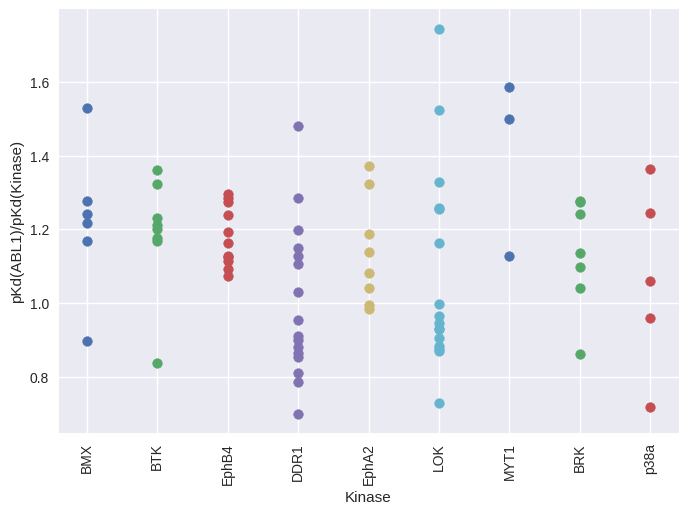

In [280]:
kinases_to_eval = distances_per_structure_abl_unqiue['kinase.2'].to_list()
kinases_to_eval.remove('ABL1')

kinase_to_selectivity_profile_abl_dict = {}
for kinase in kinases_to_eval:
    ligand_kinase_matrix_tmp = ligand_kinase_matrix.loc[['ABL1',kinase],:]
    ligand_kinase_matrix_tmp = ligand_kinase_matrix_tmp.dropna(axis=1)
    ligand_kinase_matrix_tmp_pkds = -np.log10(ligand_kinase_matrix_tmp*10**-9)
    ratio_tmp = ligand_kinase_matrix_tmp_pkds.loc['ABL1',:]/ligand_kinase_matrix_tmp_pkds.loc[kinase,:]
    ratio_tmp = ratio_tmp.sort_values(ascending=False)
    kinase_to_selectivity_profile_abl_dict[kinase] = ratio_tmp

kinase_to_selectivity_profile_abl_dict
#scatter plots of these selectivity profiles; on x axis the kinase, and on y axis each point of the list in the dict
fig, ax = plt.subplots()
for kinase, profile in kinase_to_selectivity_profile_abl_dict.items():
    ax.scatter([kinase]*len(profile), profile)
plt.xticks(rotation=90)
#axis labels
plt.xlabel('Kinase')
plt.ylabel('pKd(ABL1)/pKd(Kinase)')
#for each kinase, add a line at the value for dasatinib

#for each kinase, get ratio of pkD_kinase.2 from distances_per_structure_abl_unqiue relative to pKd(ABL1)
# distances_per_structure_abl_unqiue['pKd_ratio'] = distances_per_structure_abl_unqiue['pKd_kinase.2']/distances_per_structure_abl_unqiue['pKd_kinase.2'].loc[distances_per_structure_abl_unqiue['kinase.2'] == 'ABL1'].values[0]

# for kinase in kinases_to_eval:
#     #get the value for dasatinib
#     dasatinib_value = distances_per_structure_abl_unqiue['pKd_ratio'].loc[distances_per_structure_abl_unqiue['kinase.2'] == kinase].values[0]
#     plt.scatter(kinase, dasatinib_value, color='red')

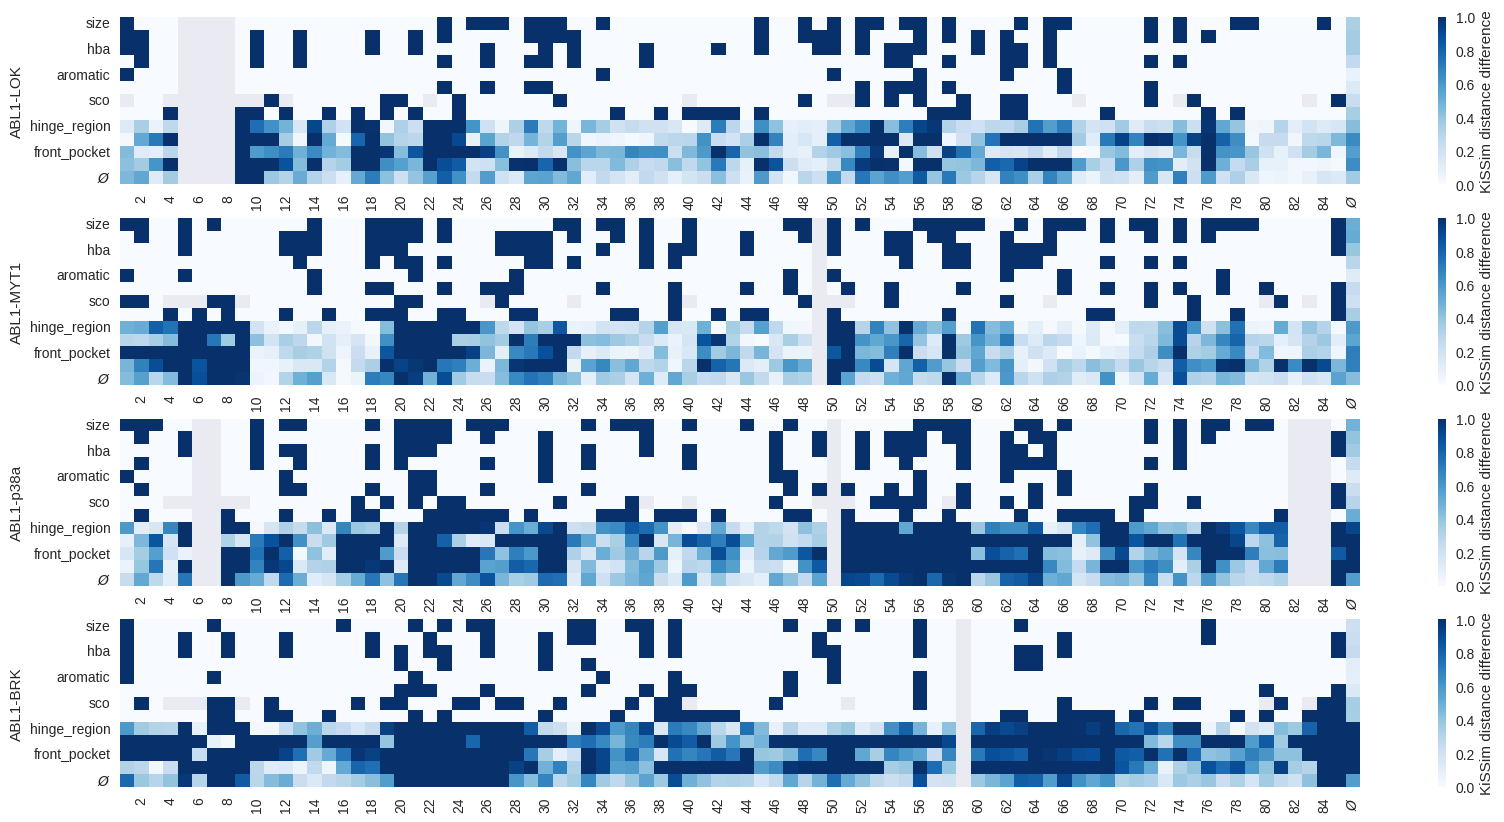

In [228]:
distances_per_structure_abl_unqiue
fig, axes = plt.subplots(4, 1, figsize=(20, 10))
plot_fingerprint_diff(fingerprint_generator_dasatinib_strucs, 1060, 8384, axes[0],'ABL1','LOK')
plot_fingerprint_diff(fingerprint_generator_dasatinib_strucs, 1060, 8339, axes[1],'ABL1','MYT1')
plot_fingerprint_diff(fingerprint_generator_dasatinib_strucs, 1060, 5018, axes[2],'ABL1','p38a')
plot_fingerprint_diff(fingerprint_generator_dasatinib_strucs, 1060, 7338, axes[3],'ABL1','BRK')

Text(1.15, 0.1, 'Ref: DFG: in, AC helix: in')

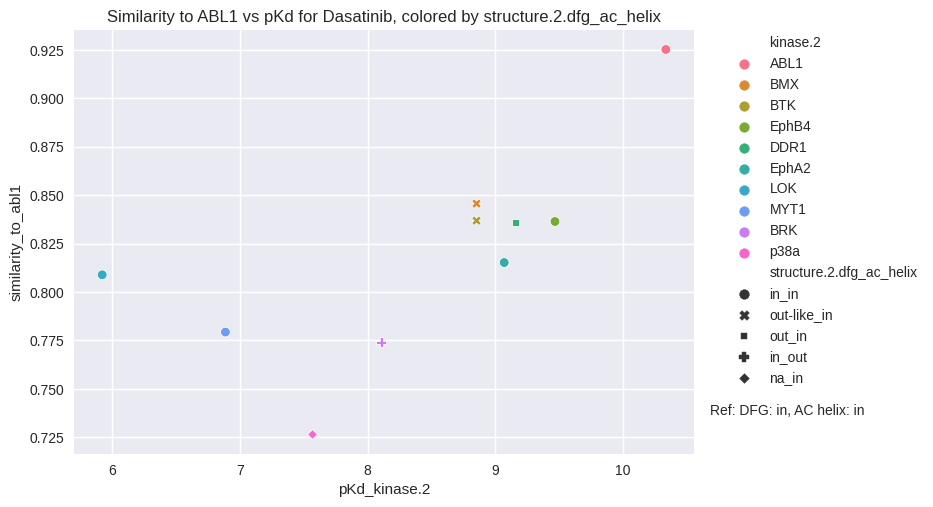

In [245]:
distances_per_structure_abl_unqiue
#okay, lets add info on structure.dfg and structure.ac_helix to distances_per_structure_abl_unqiue, based on structure.2, link v ia dasatinib_df_slim
distances_per_structure_abl_unqiue['structure.2.dfg'] = distances_per_structure_abl_unqiue['structure.2'].map(dasatinib_df_slim.set_index('structure.klifs_id')['structure.dfg'])
distances_per_structure_abl_unqiue['structure.2.ac_helix'] = distances_per_structure_abl_unqiue['structure.2'].map(dasatinib_df_slim.set_index('structure.klifs_id')['structure.ac_helix'])
#add new column: 'structure.2.dfg_ac_helix' which is the combination of dfg and ac_helix
distances_per_structure_abl_unqiue['structure.2.dfg_ac_helix'] = distances_per_structure_abl_unqiue['structure.2.dfg'] + '_' + distances_per_structure_abl_unqiue['structure.2.ac_helix']
distances_per_structure_abl_unqiue
#now do the same scatter plot, but with shape based on dfg_ac_helix
sns.scatterplot(x='pKd_kinase.2', y='similarity_to_abl1', data=distances_per_structure_abl_unqiue, hue='kinase.2', style='structure.2.dfg_ac_helix')

#move legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#and add structure.2.dfg_ac_helix to the title
plt.title('Similarity to ABL1 vs pKd for Dasatinib, colored by structure.2.dfg_ac_helix')
#and add a textbox with the dfg and ac_helix values for the comparison structure (1060)
comparison_structure = 1060
comparison_structure_dfg = dasatinib_df_slim[dasatinib_df_slim['structure.klifs_id'] == comparison_structure]['structure.dfg'].values[0]
comparison_structure_ac_helix = dasatinib_df_slim[dasatinib_df_slim['structure.klifs_id'] == comparison_structure]['structure.ac_helix'].values[0]
plt.text(1.15, 0.1, f'Ref: DFG: {comparison_structure_dfg}, AC helix: {comparison_structure_ac_helix}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


In [230]:
dasatinib_df_slim

,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl,residuals,similarity_to_abl,residuals_abl
3141,8384,5owr,LOK,1200.000,in,in,2.30,6.4,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,5.920819,0.191085,5.729734,0.808915,0.082561
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000,10.337242,1.000000,0.069909
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649,6.665408,0.779351,0.008469
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099,8.720773,0.866901,0.005240
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971,8.707901,0.854029,-0.007632
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
3721,10761,6bsd,DDR1,0.690,out-like,in,2.61,8.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467,9.017684,0.856533,-0.019303
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598,7.893307,0.785402,-0.041846


In [ ]:
#okay, so huge structural differences here!

[0.7447171817055345, 0.8565332291773697, 0.8540286497958284, 0.8089148912741883, 0.8669008150822852, 0.7854020761509113, 0.829629443913616, 0.7793509369533427, 0.8364501930798262]
[0, 1, 1, 0, 1, 0, 1, 0, 1]
[7.568636235841013, 9.161150909262744, 8.853871964321762, 5.920818753952375, 8.853871964321762, 8.10790539730952, 9.070581074285707, 6.886056647693163, 9.468521082957745]


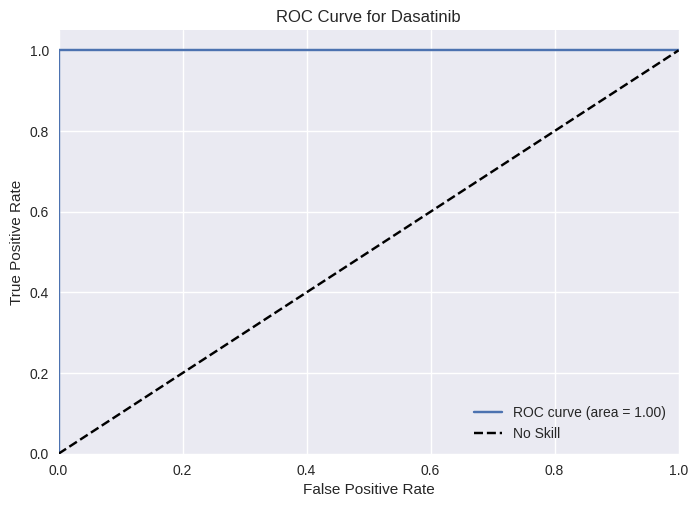

In [127]:
dasatinib_df_slim = dasatinib_df_slim.sort_values(by='structure.qualityscore')
dasatinib_df_slim_unique = dasatinib_df_slim.drop_duplicates(subset='kinase.klifs_name')
dasatinib_df_slim_unique_no_abl = dasatinib_df_slim_unique[dasatinib_df_slim_unique['kinase.klifs_name'] != 'ABL1']
#also get the distance to ABL
distance_to_abl = dasatinib_df_slim_unique_no_abl['distance_to_abl'].to_list()
similarity_to_abl = [1 - x for x in distance_to_abl]
#and the labels
labels = [1 if kinase in off_targets else 0 for kinase in dasatinib_df_slim_unique_no_abl['kinase.klifs_name'].to_list()]
#print distances, labels, and pkds
print(similarity_to_abl)
print(labels)
print(dasatinib_df_slim_unique_no_abl['pKd'].to_list())
fpr, tpr, thresholds = roc_curve(labels, similarity_to_abl)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dasatinib')
plt.legend()
plt.show()

In [128]:
dasatinib_df_slim_unique_no_abl

,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl
2058,5018,3lfa,p38a,27.00,na,in,2.10,6.1,SPVGS__YGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,7.568636,0.255283
1301,3254,5bvw,DDR1,0.69,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467
1428,3482,3sxr,BMX,1.40,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971
3141,8384,5owr,LOK,1200.00,in,in,2.30,6.4,GELG____GKVYKAAAKVIDYIVEIEILATCDPYIVKLLGAWIMIE...,5.920819,0.191085
1165,2932,3k54,BTK,1.40,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099
2930,7338,5h2u,BRK,7.80,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598
2870,7194,5i9y,EphA2,0.85,in,in,1.23,8.0,KVIGAGEFGEVYKVAIKTLDFLGEAGIMGQFSHNIIRLEGVMIITE...,9.070581,0.170371
3127,8339,5vcv,MYT1,130.00,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649
3588,10342,6fnm,EphB4,0.34,in,in,1.16,8.0,EVIGAGEFGEVCRVAIKTLEFLSEASIMGQFEPNIIRLEGVMILTE...,9.468521,0.163550


In [131]:
dasatinib_df_slim_unique_no_abl[['pKd','distance_to_abl']].reset_index(drop=True)

,pKd,distance_to_abl
0,7.568636,0.255283
1,9.161151,0.143467
2,8.853872,0.145971
3,5.920819,0.191085
4,8.853872,0.133099
5,8.107905,0.214598
6,9.070581,0.170371
7,6.886057,0.220649
8,9.468521,0.163550


0.7777777777777778


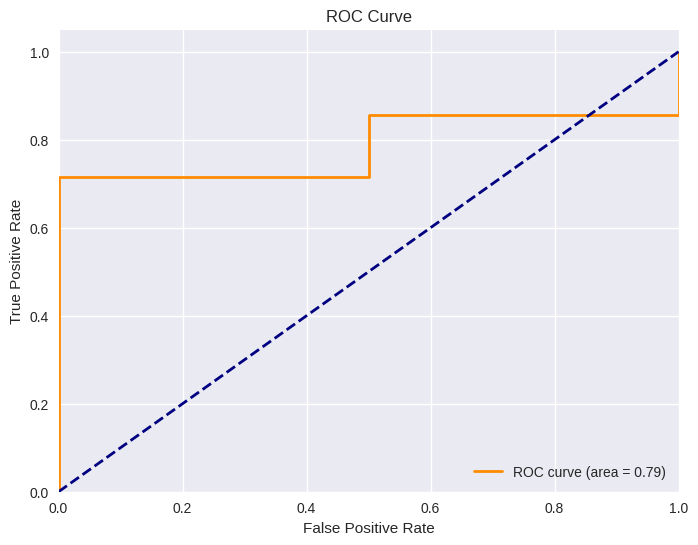

In [133]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Create the DataFrame
data = {'pKd': [7.568636, 9.161151, 8.853872, 5.920819, 8.853872, 8.107905, 9.070581, 6.886057, 9.468521],
        'distance_to_abl': [0.255283, 0.143467, 0.145971, 0.191085, 0.133099, 0.214598, 0.170371, 0.220649, 0.163550]}
df = pd.DataFrame(data)

# Step 2: Set pKd threshold for defining active and inactive
threshold = 7.5
df['active'] = df['pKd'] > threshold
#print % of actives
print(df['active'].sum()/len(df))
# Step 3: Invert the predictor distance_to_abl
df['inv_distance'] = -df['distance_to_abl']

# Step 4: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df['active'], df['inv_distance'])
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


0.6666666666666666


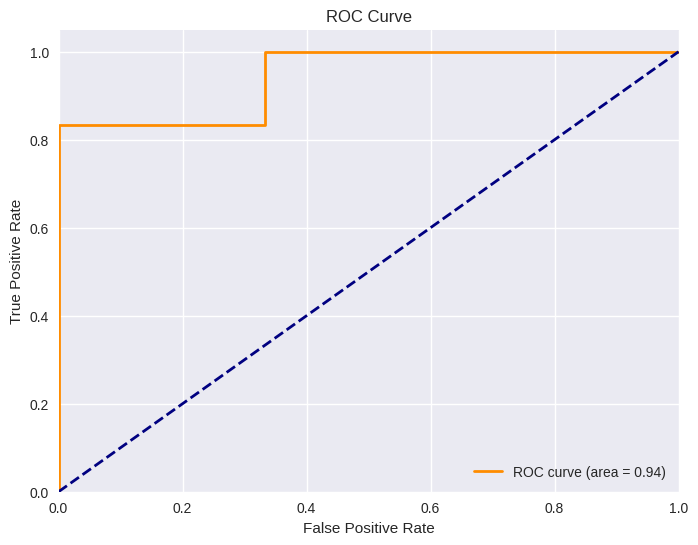

In [139]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Create the DataFrame
data = {'pKd': [7.568636, 9.161151, 8.853872, 5.920819, 8.853872, 8.107905, 9.070581, 6.886057, 9.468521],
        'distance_to_abl': [0.255283, 0.143467, 0.145971, 0.191085, 0.133099, 0.214598, 0.170371, 0.220649, 0.163550]}
df = pd.DataFrame(data)

# Step 2: Set pKd threshold for defining active and inactive
threshold = 8
df['active'] = df['pKd'] > threshold
#print % of actives
print(df['active'].sum()/len(df))
# Step 3: Invert the predictor distance_to_abl
df['inv_distance'] = -df['distance_to_abl']

# Step 4: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df['active'], df['inv_distance'])
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

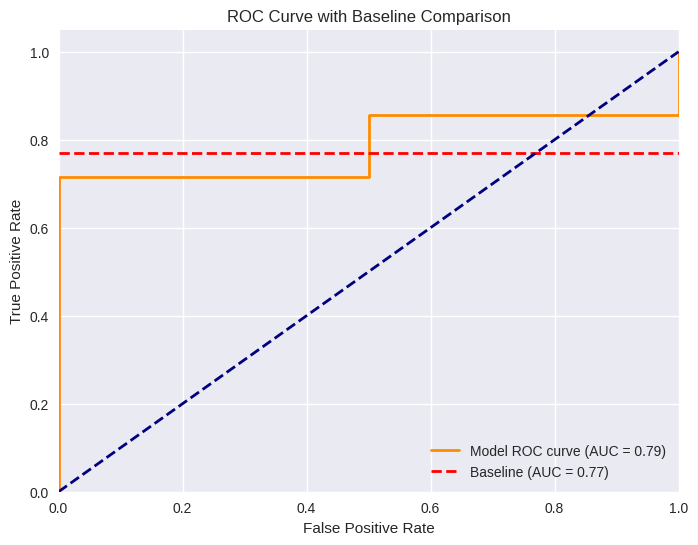

In [134]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Define the data
data = {'pKd': [7.568636, 9.161151, 8.853872, 5.920819, 8.853872, 8.107905, 9.070581, 6.886057, 9.468521],
        'distance_to_abl': [0.255283, 0.143467, 0.145971, 0.191085, 0.133099, 0.214598, 0.170371, 0.220649, 0.163550]}
df = pd.DataFrame(data)

# Step 2: Define active compounds based on pKd threshold
threshold = 7.5
df['active'] = df['pKd'] > threshold

# Step 3: Invert predictor variable to match higher values with higher pKd
df['inv_distance'] = -df['distance_to_abl']

# Step 4: Compute ROC curve and AUC for the model
fpr, tpr, _ = roc_curve(df['active'], df['inv_distance'])
roc_auc = auc(fpr, tpr)

# Step 5: Calculate and plot baseline ROC (horizontal line at 0.77)
baseline_auc = 0.77

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Model ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [baseline_auc, baseline_auc], color='red', lw=2, linestyle='--', label=f'Baseline (AUC = {baseline_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Baseline Comparison')
plt.legend(loc="lower right")
plt.show()


In [126]:
# # Get labels
# y_true = data[f"{ligand_vs_kinase_data.ligand_kinase_method}.active"].to_list()
# # Get scores
# y_score = data[f"{ligand_vs_kinase_data.kinase_kinase_method}.measure"]
# # TPR and FPR values are calculated based on different threshold values that will
# # cast the `y_score` values to True or False, if `y_score` >= `threshold`
# # Our score describes distances; if we want our score to be True if >= `threshold`,
# # we will need to convert distances to similarities
# # In short: `y_score` needs descending values!
# y_score = (1 - y_score / y_score.max()).to_list()
# pos_label = True

# # `roc_curve` returns `(fpr, tpr, thresholds)`; number of thresholds and their values seem
# # to be set based on the input data
# fpr, tpr, _ = metrics.roc_curve(y_true, y_score, pos_label=pos_label)
# auc = metrics.roc_auc_score(y_true, y_score)
distance_to_abl = np.array(distance_to_abl)
y_score = (1 - distance_to_abl / distance_to_abl.max()).to_list()
y_score

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

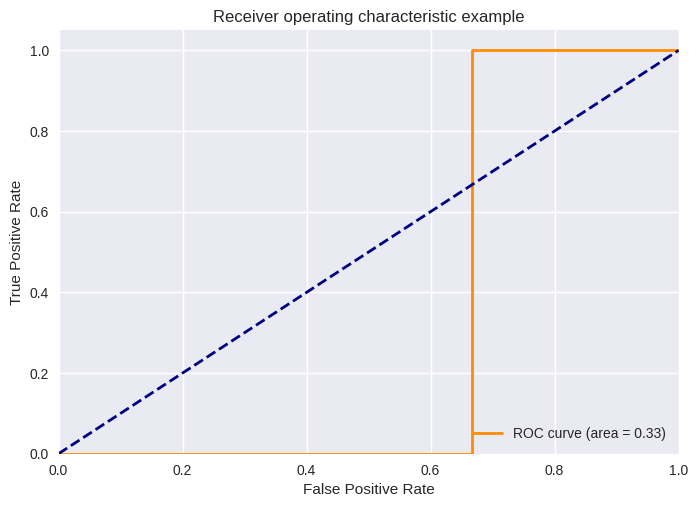

In [115]:
y_true = [1 if kinase in off_targets else 0 for kinase in dasatinib_df_slim['kinase.klifs_name']]
y_score = dasatinib_df_slim['distance_to_abl']
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [117]:
y_true

[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]

In [118]:
y_score

384     0.000000
394     0.000000
1148    0.133099
1165    0.133099
1301    0.143467
1428    0.145971
2058    0.255283
2870    0.170371
2930    0.214598
3127    0.220649
3141    0.191085
3588    0.163550
3721    0.143467
Name: distance_to_abl, dtype: float64

In [116]:
dasatinib_df_slim

,structure.klifs_id,structure.pdb_id,kinase.klifs_name,ligand_kinase_matrix_value,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.pocket,pKd,distance_to_abl
384,1060,2gqg,ABL1,0.046,in,in,2.40,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000
394,1094,4xey,ABL1,0.046,out-like,in,2.89,6.4,HKLGG____EVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,10.337242,0.000000
1148,2899,3oct,BTK,1.400,out-like,in,1.95,8.2,KELG__QFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099
1165,2932,3k54,BTK,1.400,in,in,1.94,7.2,KELGTGQFGVVKYVAIKMIEFIEEAKVMMNLSEKLVQLYGVFIITE...,8.853872,0.133099
1301,3254,5bvw,DDR1,0.690,out,in,1.94,6.4,EKLGEGQFGEVHLVAVKILDFLKEVKIMSRLKPNIIRLLGVCMITD...,9.161151,0.143467
1428,3482,3sxr,BMX,1.400,out-like,in,2.40,6.4,KELGS____VVKLVAVKMIEFFQEAQTMMKLSPKLVKFYGVYIVTE...,8.853872,0.145971
2058,5018,3lfa,p38a,27.000,na,in,2.10,6.1,SPVGS__YGSVCAVAVKKLRTYRELRLLKHMKENVIGLLDVYLVTH...,7.568636,0.255283
2870,7194,5i9y,EphA2,0.850,in,in,1.23,8.0,KVIGAGEFGEVYKVAIKTLDFLGEAGIMGQFSHNIIRLEGVMIITE...,9.070581,0.170371
2930,7338,5h2u,BRK,7.800,in,out,2.24,7.6,RKLGSGYFGEVFEVAIKVIMLQSEIQAMKKLRKHILALYAVYIITE...,8.107905,0.214598
3127,8339,5vcv,MYT1,130.000,in,in,1.92,8.0,SRLGHGSYGEVFKYAVKRSRKLAEVGSHEKVGPCCVRLEQAYLQTE...,6.886057,0.220649
